## comparing experimental and model' animalness 

In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function
import os
import pickle
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd -q ../test/

inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width_pt = 265. # Get this from LaTeX using \showthe\columnwidth
fig_width = fig_width_pt*inches_per_pt  # width in inches
figsize4 = (fig_width, fig_width/1.618)
formats = ['png', 'jpg', 'pdf', 'eps'] # jpeg tiff eps

In [3]:
# serre's data : 1200 lines (one for each image) with the filename, 
import csv
human, serre07 = {}, {}
i =0
with open('../database/AnimalnessIndex.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        #print(i, row)
        filename = row[0]
        human[filename], serre07[filename] = np.float(row[1])/100., np.float(row[2])/100.
        i += 1
#print(human)

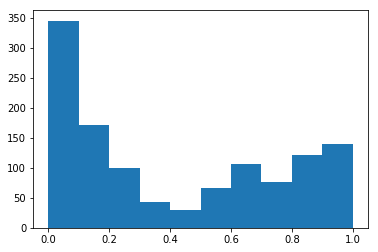

In [4]:
_ = plt.hist(list(human.values()))

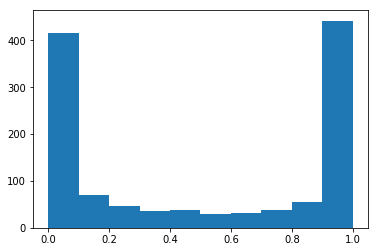

In [5]:
_ = plt.hist(list(serre07.values()))

In [6]:
from SparseEdges import EdgeFactory
ef = EdgeFactory('../notebooks/srep_param.py')
ef.pe.figpath = '../figures'
print(ef.pe)

{'verbose': 40, 'N_image': None, 'seed': 42, 'N_X': 256, 'N_Y': 256, 'noise': 0.33, 'do_mask': True, 'mask_exponent': 3.0, 'do_whitening': True, 'white_name_database': 'serre07_distractors', 'white_n_learning': 0, 'white_N': 0.07, 'white_N_0': 0.0, 'white_f_0': 0.4, 'white_alpha': 1.4, 'white_steepness': 4.0, 'white_recompute': False, 'base_levels': 1.618, 'n_theta': 24, 'B_sf': 0.4, 'B_theta': 0.17453277777777776, 'N': 2048, 'MP_alpha': 0.7, 'MP_rho': None, 'eta_SO': 0.0, 'MP_do_mask': True, 'd_width': 45.0, 'd_min': 0.5, 'd_max': 2.0, 'N_r': 6, 'N_Dtheta': 24, 'N_phi': 12, 'N_scale': 5, 'loglevel_max': 7, 'edge_mask': True, 'do_rank': False, 'scale_invariant': True, 'multiscale': True, 'kappa_phase': 0.0, 'weight_by_distance': True, 'svm_n_jobs': -1, 'svm_test_size': 0.2, 'N_svm_grid': 32, 'N_svm_cv': 50, 'C_range_begin': -5, 'C_range_end': 10.0, 'gamma_range_begin': -14, 'gamma_range_end': 3, 'svm_KL_m': 0.34, 'svm_tol': 0.001, 'svm_max_iter': -1, 'svm_log': False, 'svm_norm': False

In [7]:
# our data
N_obs = 100 # 24
assofield = {}
exp = 'srep'

These files give the number of times an image has been classified as a target:

In [8]:
filename = 'cache_dir/' + exp + '_SVM_serre07_distractors_serre07_targets_chevron.pickle'
filename = 'cache_dir/' + exp + '_SVM_serre07_distractors_serre07_targets_full.pickle'
filename = 'cache_dir/srep_SVM_serre07_distractors_serre07_targets_full.pickle'

with open(filename, "rb" ) as f:
    score_dic = pickle.load( f )
#print score_dic

In [9]:
print('number of possible images :', len(score_dic.keys()))
print('one sample entry : ', list(score_dic.keys())[0], list(score_dic.values())[0], score_dic[list(score_dic.keys())[0]])
print('number of tested images :', sum([j for j, _ in list(score_dic.values())]))

number of possible images : 1200
one sample entry :  F_N408025.jpg [8, 8] [8, 8]
number of tested images : 12000


In [10]:
assofield = {}
for filename_ in score_dic.keys():
    if score_dic[filename_][0]>0:
        assofield[filename_] = 1.*score_dic[filename_][1]/score_dic[filename_][0]
#print(assofield)

## extreme false alarms

Isolating the distractors detected as animals

In [11]:
assofield_score = {}
for filename in assofield.keys():
    if filename[1] == 'd': # the image does not contain an animal
        assofield_score[filename] = assofield[filename]  # the ratio of time it reported an animal

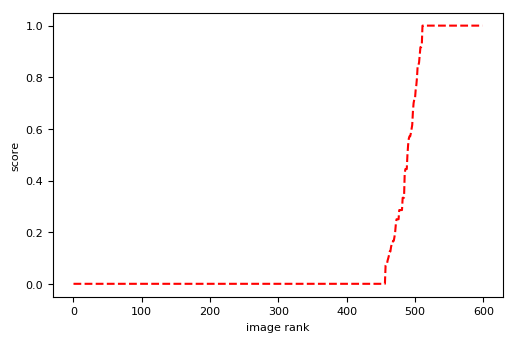

In [12]:
ind = np.argsort(list(assofield_score.values()))
plt.plot( np.array(list(assofield_score.values()))[ind], 'r--' )
plt.xlabel('image rank')
plt.ylabel('score')


In [13]:
#ind_false_alarms = list(assofield_score.values())>.99
print(np.array(list(assofield_score.values()))[ind][-100:])

[ 0.714  0.75   0.769  0.8    0.846  0.846  0.857  0.889  0.917  0.917
  0.923  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.   ]


In [14]:
print([list(assofield_score.keys())[k] for k in ind[-100:]])

['Hdn_objn18.jpg', 'Bdn_text23.jpg', 'Fdn_open20.jpg', 'Fdn_nat322.jpg', 'Bdn_nat915.jpg', 'Hdn_N124055.jpg', 'Hdn_natu623.jpg', 'Hdn_objn56.jpg', 'Fdn_nat895.jpg', 'Mda_archi327.jpg', 'Hda_obj87.jpg', 'Hdn_natu370.jpg', 'Hda_obj176.jpg', 'Mdn_text113.jpg', 'Hda_obj73.jpg', 'Mdn_natu961.jpg', 'Mdn_natu462.jpg', 'Hda_obj144.jpg', 'Bdn_nat219.jpg', 'Bdn_nat306.jpg', 'Mdn_land760.jpg', 'Hdn_objn213.jpg', 'Hdn_objn80.jpg', 'Fdn_land13.jpg', 'Hda_obj205.jpg', 'Bdn_land377.jpg', 'Mdn_N344070.jpg', 'Hda_obj47.jpg', 'Mdn_land94.jpg', 'Hdn_objn42.jpg', 'Fdn_nat10.jpg', 'Mdn_N344035.jpg', 'Bdn_land759.jpg', 'Mdn_N344038.jpg', 'Hdn_N152028.jpg', 'Fdn_open14.jpg', 'Mdn_land170.jpg', 'Hda_obj111.jpg', 'Hdn_objn227.jpg', 'Hdn_N115084.jpg', 'Mdn_natu42.jpg', 'Hdn_objn200.jpg', 'Hda_obj51.jpg', 'Mda_arnat105.jpg', 'Bdn_natu419.jpg', 'Mdn_nat363.jpg', 'Fdn_land12.jpg', 'Mdn_land750.jpg', 'Bdn_land753.jpg', 'Mdn_land82.jpg', 'Fdn_open6.jpg', 'Hda_obj76.jpg', 'Hdn_objn19.jpg', 'Hda_obj59.jpg', 'Bdn_text1

In [15]:
false_alarms = []
for i_ind, (filename, croparea) in enumerate(ef.get_imagelist(exp, name_database='serre07_distractors')):
    if filename in [list(assofield_score.keys())[k] for k in ind[-100:]]: 
        false_alarms.append(i_ind)
        print(assofield_score[filename], end=', ')
print()
print('Number of false alarms: ', len(false_alarms))

1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.888888888889, 0.846153846154, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.769230769231, 1.0, 1.0, 1.0, 1.0, 1.0, 0.857142857143, 1.0, 1.0, 1.0, 0.846153846154, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.8, 1.0, 1.0, 0.714285714286, 1.0, 1.0, 1.0, 1.0, 0.916666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.923076923077, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.916666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
Number of false alarms:  100


Chevron plot of the 50 worst false alarms as given by the classifier

In [16]:
v_hist1 = np.load('cache_dir/' + exp + '_ms1.npy') # distractors
v_hist2 = np.load('cache_dir/' + exp + '_ms2.npy') # targets

def ___KL(v_hist_obs, v_hist):
    from scipy.stats import entropy
    return entropy(v_hist_obs, v_hist, base=2)
KL = ef.KL
N_FA = 150
false_alarms, control_distance_to_1,  control_distance_to_2, distance_to_1, distance_to_2 = [], [], [], [], []
fa_list = [list(assofield_score.keys())[k] for k in ind[-N_FA:]]
for i_ind, (filename, croparea) in enumerate( ef.get_imagelist(exp, name_database='serre07_distractors')):
    if filename in fa_list: 
        false_alarms.append(i_ind)
        #print mp.KL(v_hist1[..., i_ind], v_hist1.sum(axis=-1)), mp.KL(v_hist1[..., i_ind], v_hist2.sum(axis=-1)), mp.KL(v_hist1[..., i_ind], v_hist1.sum(axis=-1)) > mp.KL(v_hist1[..., i_ind], v_hist2.sum(axis=-1))
        #print KL(v_hist1.sum(axis=-1), v_hist1[..., i_ind]), KL(v_hist2.sum(axis=-1), v_hist1[..., i_ind]), KL(v_hist1.sum(axis=-1), v_hist1[..., i_ind]) > KL(v_hist2.sum(axis=-1), v_hist1[..., i_ind])
        # checking it is the same :print (mp.KL(v_hist1[..., i_ind], v_hist1.sum(axis=-1)) > mp.KL(v_hist1[..., i_ind], v_hist2.sum(axis=-1))) == (mp.KL(v_hist1.sum(axis=-1), v_hist1[..., i_ind]) > mp.KL(v_hist2.sum(axis=-1), v_hist1[..., i_ind]))
        distance_to_1.append(ef.KL(v_hist1.sum(axis=-1), v_hist1[..., i_ind]))
        distance_to_2.append(ef.KL(v_hist2.sum(axis=-1), v_hist1[..., i_ind]))
    else:
        control_distance_to_1.append(ef.KL(v_hist1.sum(axis=-1), v_hist1[..., i_ind]))
        control_distance_to_2.append(ef.KL(v_hist2.sum(axis=-1), v_hist1[..., i_ind]))

        

/Users/lolo/pool/science/BICV/SparseEdges/SparseEdges/SparseEdges.py:688: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if not(prior==None):


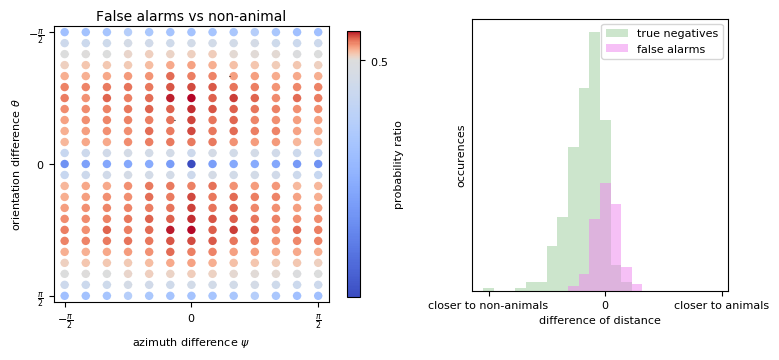

In [17]:
figsize1 = (fig_width, 2*fig_width)
figsize2 = (fig_width, fig_width*.9)
figsize3 = (2*fig_width, 2*fig_width/1.618)
v_max, v_min = 2., -1.
v_max, v_min = None, None

fig = plt.figure(figsize=figsize3)
ratio = figsize3[1]/figsize3[0]
border = 0.03

#              *left*, *bottom*, *width*, *height*
a = fig.add_axes((0.03, border*ratio, .5-border, 1.-border*ratio), axisbg='w')
a.axis(c='b', lw=0)
dolog = True
fig, a = ef.cohistedges(edgeslist=None, v_hist=v_hist1[..., false_alarms].sum(axis=-1), prior=v_hist1.mean(axis=-1), fig=fig, a=a, display='chevrons', 
                             dolog=dolog, labels=True, xticks=True, colorbar=True, v_min=v_min, v_max=v_max)
_ = a.set_title('False alarms vs non-animal', fontsize=10)

border = 0.2
N_bin = 23
#              *left*, *bottom*, *width*, *height*
a = fig.add_axes((.6, .23, .35, .6), axisbg='w')
d_max = np.max((np.max(np.abs(np.array(distance_to_1)-np.array(distance_to_2))), np.max(np.abs(np.array(control_distance_to_1)-np.array(control_distance_to_2)))))
n_bin, bins = np.histogram(np.array(distance_to_1)-np.array(distance_to_2), bins=np.linspace(-d_max, d_max, N_bin))
control_n_bin, bins = np.histogram(np.array(control_distance_to_1)-np.array(control_distance_to_2), bins=np.linspace(-d_max, d_max, N_bin))
a.bar(bins[:-1], control_n_bin, width = bins[1]-bins[0], color='green', alpha=.2, label='true negatives')
a.bar(bins[:-1], n_bin, width = bins[1]-bins[0], color='violet', alpha=.5, label='false alarms')
a.legend(loc='upper right')
plt.setp(a, xlabel='difference of distance')
plt.setp(a, ylabel='occurences')
middles = (bins[:-1]+bins[1:])/2.
plt.setp(a, xticks=[-d_max, 0, d_max])
plt.setp(a, xticklabels=['closer to non-animals', '0', 'closer to animals'])
plt.setp(a, yticks=[])
a.axis('tight')

ef.savefig(fig, 'figureSM_FA', figpath=None)

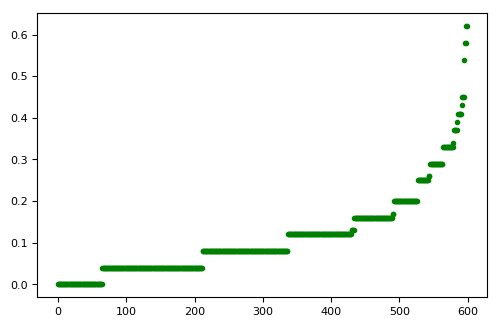

In [18]:
human_score = {}
for filename in list(human.keys()):
    if filename[1] == 'd':
        human_score[filename] = human[filename]  # distractor

ind = np.argsort(list(human_score.values()))
plt.plot( np.array(list(human_score.values()))[ind], 'g.' )

In [19]:

KL = ef.KL
N_FA = 50

false_alarms, control_distance_to_1,  control_distance_to_2, distance_to_1, distance_to_2 = [], [], [], [], []
fa_list = [list(human_score.keys())[k] for k in ind[-N_FA:]]
for i_ind, (filename, croparea) in enumerate( ef.get_imagelist(exp, name_database='serre07_distractors')):
    if filename in fa_list: 
        false_alarms.append(i_ind)
        distance_to_1.append(ef.KL(v_hist1.sum(axis=-1), v_hist1[..., i_ind]))
        distance_to_2.append(ef.KL(v_hist2.sum(axis=-1), v_hist1[..., i_ind]))
    else:
        control_distance_to_1.append(ef.KL(v_hist1.sum(axis=-1), v_hist1[..., i_ind]))
        control_distance_to_2.append(ef.KL(v_hist2.sum(axis=-1), v_hist1[..., i_ind]))

   

/Users/lolo/pool/science/BICV/SparseEdges/SparseEdges/SparseEdges.py:688: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if not(prior==None):


550 50


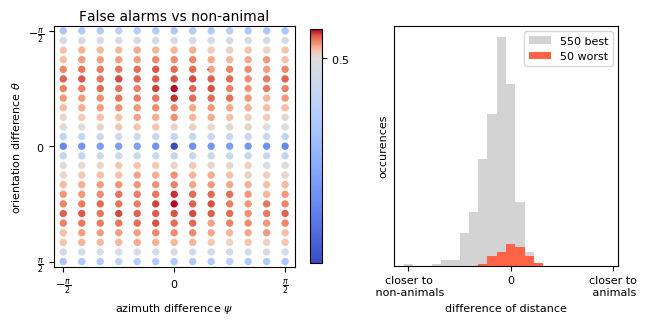

In [20]:
figsize3 = (1.75*fig_width, 1.75*fig_width/1.618)
v_max, v_min = 2., -1.
v_max, v_min = None, None

fig = plt.figure(figsize=figsize3)
ratio = figsize3[1]/figsize3[0]
border = 0.03

#              *left*, *bottom*, *width*, *height*
a = fig.add_axes((0.07, border*ratio, .5-border, 1.-border*ratio), axisbg='w')
a.axis(c='b', lw=0)
dolog = True
fig, a = ef.cohistedges(edgeslist=None, v_hist=v_hist1[..., false_alarms].sum(axis=-1), prior=v_hist1.mean(axis=-1), fig=fig, a=a, display='chevrons', 
                             dolog=dolog, labels=True, xticks=True, colorbar=True, cbar_label=False, v_min=v_min, v_max=v_max)
_ = a.set_title('False alarms vs non-animal', fontsize=10)
print(len(control_distance_to_1), len(distance_to_1))
border = 0.2
N_bin = 23
#              *left*, *bottom*, *width*, *height*
a = fig.add_axes((.6, .208, .35, .605), axisbg='w')
d_max = np.max((np.max(np.abs(np.array(distance_to_1)-np.array(distance_to_2))), np.max(np.abs(np.array(control_distance_to_1)-np.array(control_distance_to_2)))))
n_bin, bins = np.histogram(np.array(distance_to_1)-np.array(distance_to_2), bins=np.linspace(-d_max, d_max, N_bin))
control_n_bin, bins = np.histogram(np.array(control_distance_to_1)-np.array(control_distance_to_2), bins=np.linspace(-d_max, d_max, N_bin))
a.bar(bins[:-1], control_n_bin, width = bins[1]-bins[0], color='lightgray', label='550 best')
a.bar(bins[:-1], n_bin, width = bins[1]-bins[0], color='tomato', label='50 worst')
a.legend(loc='upper right')
plt.setp(a, xlabel='difference of distance')
plt.setp(a, ylabel='occurences')
middles = (bins[:-1]+bins[1:])/2.
plt.setp(a, xticks=[-d_max, 0, d_max])
plt.setp(a, xticklabels=['closer to\n non-animals', '0', 'closer to\n animals'])
plt.setp(a, yticks=[])
a.axis('tight')

ef.savefig(fig, 'figure_FA_humans', figpath=None)

In [21]:
    
dm = np.mean(np.array(distance_to_1)-np.array(distance_to_2)) - np.mean(np.array(control_distance_to_1)-np.array(control_distance_to_2))
dvar = np.std(np.array(distance_to_1)-np.array(distance_to_2))**2 + np.std(np.array(control_distance_to_1)-np.array(control_distance_to_2))**2
print('dprime = ', dm / np.sqrt(.5 * dvar ))

dprime =  1.03671684846


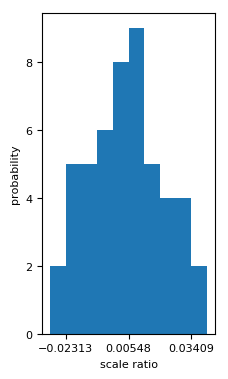

In [22]:
fig = plt.figure(figsize=figsize2)
ratio = figsize2[1]/figsize2[0]
border = 0.03

a = fig.add_axes((.5+border, border*ratio, .5-border, 1.-border*ratio), axisbg='w')

n_bin, bins = np.histogram(np.array(distance_to_1)-np.array(distance_to_2))
a.bar(bins[:-1], n_bin, width = bins[1]-bins[0])
plt.setp(a, xlabel='scale ratio')
plt.setp(a, ylabel='probability')
middles = (bins[:-1]+bins[1:])/2.
plt.setp(a, xticks=middles[::4])

Chevron plot of the non-animal images whose histograms are closer to the average animal images rather with respect to the non-animal images:

/Users/lolo/pool/science/BICV/SparseEdges/SparseEdges/SparseEdges.py:688: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if not(prior==None):


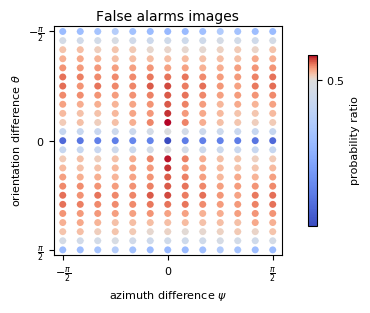

In [23]:
v_hist1 = np.load('cache_dir/' + exp + '_ms1.npy') # distractors
v_hist2 = np.load('cache_dir/' + exp + '_ms2.npy') # targets

false_alarms = []
for i_ind, (filename, croparea) in enumerate(ef.get_imagelist(exp, name_database='serre07_distractors')):
    if ef.KL(v_hist1[..., i_ind], v_hist1.sum(axis=-1)) > ef.KL(v_hist1[..., i_ind], v_hist2.sum(axis=-1)): 
        false_alarms.append(i_ind)
figsize1 = (fig_width, 2*fig_width)
figsize2 = (fig_width, fig_width*.9)
v_max, v_min = 2., -1.
v_max, v_min = None, None


fig = plt.figure(figsize=figsize2)
ratio = figsize2[1]/figsize2[0]
border = 0.15
a = fig.add_axes((.13, border*ratio/2, 1.-border, 1.-border*ratio), axisbg='w')
a.axis(c='b', lw=0)
dolog = True
fig, a = ef.cohistedges(edgeslist=None, v_hist=v_hist1[..., false_alarms].sum(axis=-1), prior=v_hist1.mean(axis=-1), fig=fig, a=a, display='chevrons', 
                             dolog=dolog, labels=True, xticks=True, colorbar=True, v_min=v_min, v_max=v_max)
_ = a.set_title('False alarms images', fontsize=10)

/Users/lolo/pool/science/BICV/SparseEdges/SparseEdges/SparseEdges.py:688: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if not(prior==None):


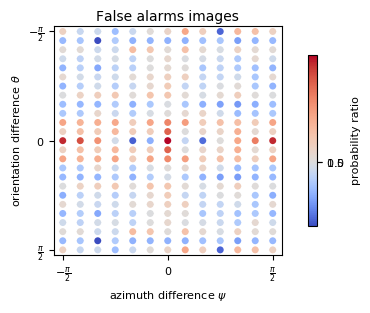

In [24]:
false_alarms = []
for i_ind, (filename, croparea) in enumerate( list(ef.get_imagelist(exp, name_database='serre07_distractors'))):
    if filename in  [list(assofield_score.keys())[k] for k in ind[150:]]: false_alarms.append(i_ind)

v_hist1 = np.load('cache_dir/' + exp + '_ms1.npy') # distractors
v_hist2 = np.load('cache_dir/' + exp + '_ms2.npy') # targets

figsize1 = (fig_width, 2*fig_width)
figsize2 = (fig_width, fig_width*.9)
v_max, v_min = 2., -1.
v_max, v_min = None, None


fig = plt.figure(figsize=figsize2)
ratio = figsize2[1]/figsize2[0]
border = 0.15
a = fig.add_axes((.13, border*ratio/2, 1.-border, 1.-border*ratio), axisbg='w')
a.axis(c='b', lw=0)
dolog = True
fig, a = ef.cohistedges(edgeslist=None, v_hist=v_hist1[..., false_alarms].sum(axis=-1), prior=v_hist1.mean(axis=-1), fig=fig, a=a, display='chevrons', 
                             dolog=dolog, labels=True, xticks=True, colorbar=True, v_min=v_min, v_max=v_max)
_ = a.set_title('False alarms images', fontsize=10)

### version control

In [25]:
!git s

 M ../Makefile
 M ../figures/MPtutorial.pdf
 M ../figures/MPtutorial.svg
 M ../figures/MPtutorial_rec.pdf
 M ../figures/MPtutorial_rec.svg
 D ../figures/figure4.png
 M ../figures/figureSM2A.pdf
 M ../figures/figureSM2A.svg
 M ../figures/figureSM2B.pdf
 M ../figures/figureSM2B.svg
 M ../figures/figureSM_FA.pdf
 M ../figures/figureSM_FA.svg
 M ../figures/figure_FA_humans.pdf
 M ../figures/figure_FA_humans.svg
 M ../figures/figure_chevrons.pdf
 M ../figures/figure_chevrons.svg
 M ../figures/figure_chevrons2.pdf
 M ../figures/figure_chevrons2.svg
M  ../figures/figure_chevrons_animals.pdf
M  ../figures/figure_chevrons_animals.svg
M  ../figures/figure_chevrons_animals_FR.pdf
M  ../figures/figure_chevrons_animals_FR.svg
 M ../ms/PerrinetBednar15supplementary.tex
 M "../notebooks/0 installation.ipynb"
 M "../notebooks/0 notebook_databases.ipynb"
 M "../notebooks/1 notebook_core_sim.ipynb"
 M "../notebooks/2 notebook_figure_model.ipynb"
 M "../notebooks/2 notebook_figure_synthesis.ipynb"
?? ../

In [26]:
!git commit -m' replicating figure for main text :  figureSM_FA_humans ' ../notebooks/5* ../figures/figure_FA_humans* ; git push

[master 4d73e39]  replicating figure for main text :  figureSM_FA_humans
 2 files changed, 1689 insertions(+), 1689 deletions(-)
Counting objects: 143, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (143/143), done.
Writing objects: 100% (143/143), 30.33 MiB | 4.25 MiB/s, done.
Total 143 (delta 70), reused 0 (delta 0)
To https://bitbucket.org/laurentperrinet/perrinetbednar15.git
   3f8e951..4d73e39  master -> master
